In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.02,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 2,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([-0.09543324, -0.06062651, -0.03316562, -0.01280821,  0.00210615,
        0.01298707,  0.02095232,  0.02684927,  0.03130194,  0.03476161,
        0.03755079,  0.03989857,  0.04196724,  0.04387192,  0.04569472,
        0.04749483,  0.04931542,  0.05118895,  0.05314033,  0.05518964,
        0.05735358,  0.0596468 ,  0.06208278,  0.06467434,  0.06743403,
        0.07037447,  0.07350861,  0.07684982,  0.08041193,  0.08420961,
        0.0882581 ,  0.09257342,  0.09717241,  0.10207273,  0.10729285,
        0.11285202,  0.11877032,  0.12506846,  0.13176787,  0.13889049,
        0.14645866,  0.1544949 ,  0.16302176,  0.17206141,  0.18163542,
        0.19176415,  0.20246631,  0.21375853,  0.22565451,  0.23816422,
        0.25129312,  0.26504138,  0.27940261,  0.29436323,  0.30990121,
        0.32598549,  0.34257519,  0.35961902,  0.37705529,  0.39481199,
        0.41280761,  0.43095213,  0.44914871,  0.46729577,  0.48528934,
        0.50302589,  0.52040505,  0.53733224,  0.55372131,  0.56

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.17859817e-01],
       [  2.00000000e+01,   4.98998046e-01],
       [  3.00000000e+01,   5.17539799e-01],
       [  4.00000000e+01,   5.33684254e-01],
       [  5.00000000e+01,   4.50120538e-01],
       [  6.00000000e+01,   4.66546029e-01],
       [  7.00000000e+01,   5.05139887e-01],
       [  8.00000000e+01,   4.55322713e-01],
       [  9.00000000e+01,   4.42264915e-01],
       [  1.00000000e+02,   5.33956170e-01],
       [  1.10000000e+02,   5.00837803e-01],
       [  1.20000000e+02,   5.28975248e-01],
       [  1.30000000e+02,   5.35401702e-01],
       [  1.40000000e+02,   4.87327665e-01],
       [  1.50000000e+02,   4.23016965e-01],
       [  1.60000000e+02,   4.57310975e-01],
       [  1.70000000e+02,   4.68445003e-01],
       [  1.80000000e+02,   4.57484215e-01],
       [  1.90000000e+02,   4.08328593e-01],
       [  2.00000000e+02,   3.75749350e-01],
       [  2.10000000e+02,   3.98944020e-01],
       [  2.20000000e+02,   3.37599069e-01],
       [  

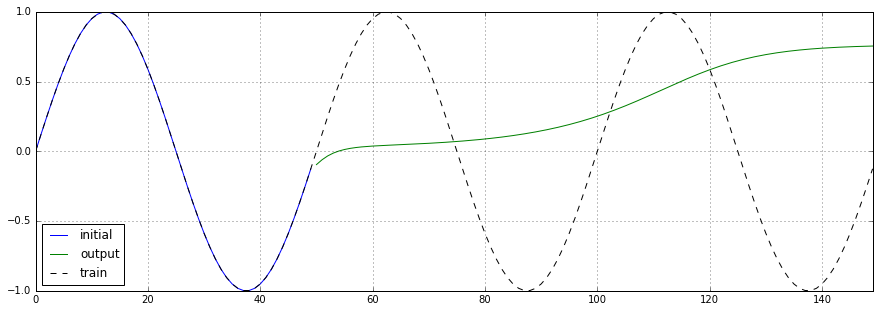

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

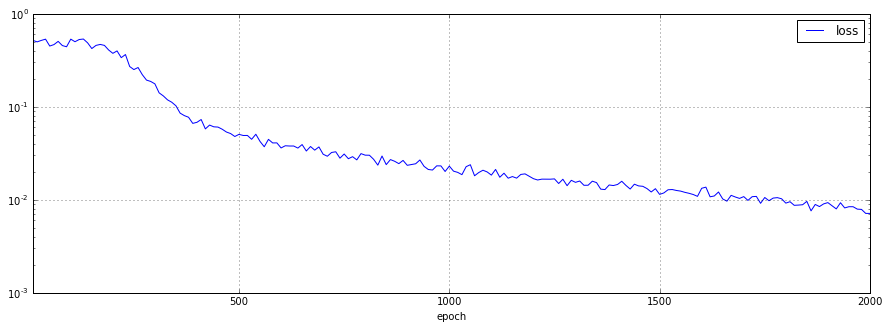

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")